In [0]:
import pandas as pd #Download the necessary modules
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**I tried using the Keras framework on my dataset**

In [0]:
df = pd.read_csv('winequality-red.csv') #read our dataset

In [595]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
#divide our dataset into predicts and result
y = df['quality']
x = df.drop(['quality'],axis = 1)


In [0]:
from sklearn.model_selection import train_test_split #split into training and test samples (we take 25%)

In [0]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.25,random_state=5)


In [0]:
#We normalize the data using the MinMax Scaller to transfer the values of the attributes to the range [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [0]:
#subtract 3 from each value of Y so that np_utils breaks it into 6 different columns
y_train -=3
y_test-= 3


In [601]:
#We split Y test and train into 6 different columns to divide them by binary. shown below
from keras.utils import np_utils 
y_train_bin = np_utils.to_categorical(y_train)
y_train_bin

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [602]:
y_test_bin = np_utils.to_categorical(y_test)
y_test_bin

array([[0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [0]:
#Getting started with creating a model.
#1) We use a sequential model
#2)Use an input layer with 11 neurons.2 hidden layers, with 9 and 10 neurons.In the output layer we use 6 neurons (multiclass).
#3)In hidden layers we use the sigmoid activation function.
#4)For the output layer, as multiclass task, use softmax


In [0]:
model1 = keras.Sequential()
model1.add(keras.layers.InputLayer([11]))
model1.add(keras.layers.Dense(9,activation='sigmoid'))
model1.add(keras.layers.Dense(10,activation='sigmoid'))
model1.add(keras.layers.Dense(6,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

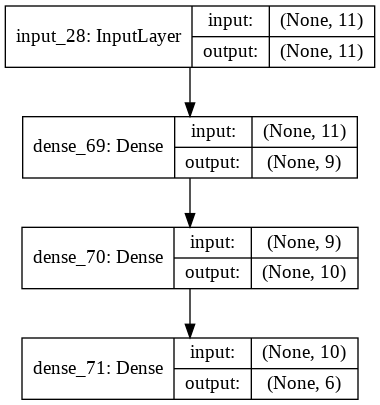

In [604]:
from keras.utils import plot_model #See visually what our neural network looks like
plot_model(model1, to_file='model.png', show_shapes=True)

In [605]:
model1.fit(X_train_scaled,y_train_bin,epochs = 100, batch_size=30) #start the training process

Epoch 1/100
1199/1199 [==============================] - 0s 94us/step - loss: 1.8123 - accuracy: 0.2027
Epoch 2/100
1199/1199 [==============================] - 0s 44us/step - loss: 1.6109 - accuracy: 0.4187
Epoch 3/100
1199/1199 [==============================] - 0s 40us/step - loss: 1.4739 - accuracy: 0.4187
Epoch 4/100
1199/1199 [==============================] - 0s 43us/step - loss: 1.3781 - accuracy: 0.4187
Epoch 5/100
1199/1199 [==============================] - 0s 39us/step - loss: 1.3104 - accuracy: 0.4187
Epoch 6/100
1199/1199 [==============================] - 0s 41us/step - loss: 1.2648 - accuracy: 0.4187
Epoch 7/100
1199/1199 [==============================] - 0s 56us/step - loss: 1.2349 - accuracy: 0.4187
Epoch 8/100
1199/1199 [==============================] - 0s 44us/step - loss: 1.2158 - accuracy: 0.4187
Epoch 9/100
1199/1199 [==============================] - 0s 43us/step - loss: 1.2033 - accuracy: 0.4195
Epoch 10/100
1199/1199 [==============================] - 0s 41u

In [606]:
test_loss , test_acc = model1.evaluate(X_test_scaled,y_test_bin)

400/400 [==============================] - 0s 81us/step


In [607]:
test_acc

0.5849999785423279

In [0]:
##Accuracy is 58%

**Keras on my dataframe**

In [0]:
#I generated my dataframe.
#1 column - age of a person
#2 column - gender
#3 column - did they give him a loan

In [0]:
age = np.random.randint(18,90,size=(100,1))
male = np.random.random((100,1))
cred = np.random.random((100,1))
male = np.around(male).astype(int)
cred = np.around(cred).astype(int)


In [611]:
df2_m = np.column_stack((age, male,cred))
df2 = pd.DataFrame(df2_m)
df2

,0,1,2
0,86,1,0
1,48,0,0
2,24,0,1
3,63,1,1
4,39,0,0
...,...,...,...
95,78,1,0
96,85,1,1
97,73,1,1
98,45,0,1


In [612]:
#Normalize the column "Age" (MinMaxScaller)
age_scaled = scaler.fit_transform(age)
age_scaled

array([[0.95774648],
       [0.42253521],
       [0.08450704],
       [0.63380282],
       [0.29577465],
       [0.57746479],
       [0.09859155],
       [0.53521127],
       [0.92957746],
       [0.26760563],
       [0.64788732],
       [0.21126761],
       [0.30985915],
       [0.71830986],
       [0.46478873],
       [0.94366197],
       [0.50704225],
       [0.85915493],
       [0.97183099],
       [0.32394366],
       [0.84507042],
       [0.14084507],
       [0.36619718],
       [0.81690141],
       [0.56338028],
       [0.28169014],
       [0.49295775],
       [0.81690141],
       [0.47887324],
       [0.54929577],
       [0.53521127],
       [0.84507042],
       [0.18309859],
       [0.76056338],
       [0.16901408],
       [0.69014085],
       [0.78873239],
       [0.08450704],
       [0.94366197],
       [0.02816901],
       [0.01408451],
       [0.63380282],
       [0.5915493 ],
       [0.26760563],
       [0.22535211],
       [0.1971831 ],
       [0.71830986],
       [0.816

In [0]:
x2 = np.column_stack((age_scaled, male)) #Merged attributes into one array

In [0]:
y2 = cred

In [0]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(x2,y2, test_size=0.2,random_state=5)

In [0]:
#Create a model
#Input layer - 2 neurons
#Hidden layer - 3 neurons
#Output layer - 1 neuron
#We use the activation function sigmoid, because Perfectly suits our task.
#We use binary cross-entropy for the loss function, since we have only 2 classes

In [0]:
model2 = keras.Sequential()
model2.add(keras.layers.InputLayer([2]))
model2.add(keras.layers.Dense(3,activation='sigmoid'))
model2.add(keras.layers.Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

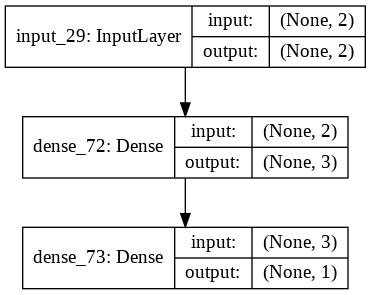

In [618]:
#the following steps have been described above 
from keras.utils import plot_model
plot_model(model2, to_file='model.png', show_shapes=True)

In [619]:
model2.fit(X_train2,y_train2,epochs=100)

Epoch 1/100
80/80 [==============================] - 0s 964us/step - loss: 0.6850 - accuracy: 0.5625
Epoch 2/100
80/80 [==============================] - 0s 67us/step - loss: 0.6849 - accuracy: 0.5625
Epoch 3/100
80/80 [==============================] - 0s 66us/step - loss: 0.6848 - accuracy: 0.5625
Epoch 4/100
80/80 [==============================] - 0s 96us/step - loss: 0.6848 - accuracy: 0.5625
Epoch 5/100
80/80 [==============================] - 0s 66us/step - loss: 0.6848 - accuracy: 0.5625
Epoch 6/100
80/80 [==============================] - 0s 76us/step - loss: 0.6847 - accuracy: 0.5625
Epoch 7/100
80/80 [==============================] - 0s 79us/step - loss: 0.6848 - accuracy: 0.5625
Epoch 8/100
80/80 [==============================] - 0s 97us/step - loss: 0.6847 - accuracy: 0.5625
Epoch 9/100
80/80 [==============================] - 0s 100us/step - loss: 0.6847 - accuracy: 0.5625
Epoch 10/100
80/80 [==============================] - 0s 109us/step - loss: 0.6846 - accuracy: 0.5

In [620]:
test_loss2 , test_acc2 = model2.evaluate(X_test2,y_test2)

20/20 [==============================] - 0s 730us/step


In [621]:
test_acc2

0.6499999761581421

In [0]:
#After checking the models on the test sample received an accuracy of 64%

**my Neural Network from task 3**

In [0]:
#We use the model from task 3 to verify the same data.

In [0]:
from sklearn.metrics import mean_squared_error

In [0]:
def Net(X_train, y_train,X_test,epochs):
      #create a sigmoid activation function, add its derivative as well
    def sigmoid(x,delt=False): 
        if delt==True: 
            return x*(1-x)
        return 1/(1+np.exp(-x))
    
    np.random.seed(1) 
    
    # 1 layer - input (2 neurons)
    #2 layer - hidden (3 neurons)
    #3 layer - output (1 neuron)
    syn0= 2*np.random.random((2,3))-1 # matrix of weights for 1 and 2 layers
    syn1 = 2*np.random.random((3,1))-1 # matrix of weights for 2 and 3 layers
    
    
    for j in range(epochs): # training cycle where range(epochs = 10000)
        l0 = X_train # input data
        # forward propagation
        l1 = sigmoid(np.dot(l0,syn0)) 
        # multiply the syn0 weight matrix by the input data from 1 layer. 
        #From this product we take the sigmoid function
                                  
        l2 = sigmoid(np.dot(l1,syn1)) #Similarly, we do for layers 2 and 3 (from hidden to the output layer)
        l2_error =l2_error =np.multiply(y_train,np.log(l2))-np.multiply((1-y_train),np.log(1-l2)) #let's check how much the network made a mistake (binary crossentropy)
        #back propagation
        l2_delta = l2_error*sigmoid(l2,True)# we multiply the error by the derivative activation function, thereby moving to the minimum of the function 
                                        ##(at the minimum of the function, the error is minimal)
        l1_error = l2_delta.dot(syn1.T)*sigmoid(l1,True)# the sum of the products of all the input weights and the delta of the neuron 
                                                    #is multiplied by the derivative of the activation function from the input value
           #
        l1_delta = l1_error*sigmoid(l1,True)# similar to l2_delta
            # count the MCE and derive it
        
#We update weights. We multiply the delta (gradient) by the learning speed (E = 1) and by the value of l.
#Multiply the old weight by the moment (alpha = 1).
#Add these two pieces
        syn1+=l1.T.dot(l2_delta) # multiply the delta_l2 by l1 (they are connected) + old weight
        syn0+=l0.T.dot(l1_delta) # multiply the delta_l1 by l0 (they are connected) + old weight
        
    #testing the model whith new data
    l0 = X_test
    l1 = sigmoid(np.dot(l0,syn0)) 
    l2 = sigmoid (np.dot(l1,syn1))

    return l2 

In [626]:
l2 = Net(X_train2, y_train2,X_test2,100)
l2

array([[1.13904960e-05],
       [5.21608157e-05],
       [4.59829916e-06],
       [2.28681788e-05],
       [1.04587348e-05],
       [9.79311790e-06],
       [1.47354676e-05],
       [9.17878362e-06],
       [3.53641775e-06],
       [1.32636429e-05],
       [4.12667864e-06],
       [6.93192629e-05],
       [9.93030785e-06],
       [8.50293659e-05],
       [2.11458666e-05],
       [1.62861562e-05],
       [1.70060959e-05],
       [2.98931733e-06],
       [3.63868180e-05],
       [7.22066417e-05]])

In [627]:
from sklearn.metrics import accuracy_score
acc_my_model = accuracy_score(np.around(l2),y_test2)
acc_my_model

0.35

In [0]:
#The accuracy of this model was 35%.

In [629]:
test_acc*100 # Keras, wine dataset

58.49999785423279

In [630]:
 #Keras         myNeuralNetwork       ----- my generated dataset
 test_acc2*100, acc_my_model*100

(64.99999761581421, 35.0)

**Results**

1) Created a model for the dataset, got an accuracy of 58% 

2)We created the model using the Keras framework and using only the numpy.
As you can see, the accuracy is almost two times different

I think it depends on the generation of weights in Keras.
According to my observations, when running the same Keras model several times (about 10б maybe more), I received different accuracy values.
You can write a cycle and repeat the model hundreds of times, then we will get different accuracy values and we can already select the best ones.
